In [1]:
import os
import json
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# import data from data-csv
keypoint_df = pd.read_csv('./keypoints.csv', index_col=0)
keypoint_df

,nose_pixel_x,nose_pixel_y,nose_scaled_x,nose_scaled_y,nose_score,left_eye_pixel_x,left_eye_pixel_y,left_eye_scaled_x,left_eye_scaled_y,left_eye_score,...,left_ankle_pixel_y,left_ankle_scaled_x,left_ankle_scaled_y,left_ankle_score,right_ankle_pixel_x,right_ankle_pixel_y,right_ankle_scaled_x,right_ankle_scaled_y,right_ankle_score,pose
./dataset-for-classification/supta-matsyendrasana/46a4ab66d050f9f6570ffd40f061c51f7b04af3da891c1da1ad293df25f17f9a.png,202.190000,298.772830,0.069002,0.495455,1.031779,165.475560,285.506070,0.019108,0.469697,0.880347,...,57.630466,1.000000,0.027273,0.228072,887.265900,57.630466,1.000000,0.027273,0.343602,supta-matsyendrasana
./dataset-for-classification/supta-matsyendrasana/e80b428803dbf47d229a1fbe211970e1ba36c2a5466368b1ffd0ba24a562c013.png,526.920300,37.670383,0.977990,0.000000,0.847540,537.234700,49.325935,1.000000,0.053170,0.824227,...,177.537030,0.231579,0.638037,0.087119,68.601720,217.434890,0.000000,0.820041,0.153936,supta-matsyendrasana
./dataset-for-classification/supta-matsyendrasana/4187f021d7e3b2d92ce2bdfabb90126e0a1f648a5e846b5cd452cafa12a3761c.png,719.845460,104.005745,0.950276,0.174129,2.304406,736.853400,120.369320,1.000000,0.217247,2.173257,...,402.326450,0.828729,0.960199,0.227667,680.790160,417.431240,0.836096,1.000000,0.325805,supta-matsyendrasana
./dataset-for-classification/supta-matsyendrasana/8fbb0fb028119ef65cbbb6aff56ed0b6835ac79a589657f43c1d8210c23b7df2.png,81.618420,80.691246,0.041439,0.250000,0.403595,66.193480,80.285126,0.000000,0.248077,0.923331,...,185.471190,1.000000,0.746154,0.213619,433.144780,181.409960,0.985823,0.726923,0.097659,supta-matsyendrasana
./dataset-for-classification/supta-matsyendrasana/ba6c35d6e327e4da9a207357ee11e2dc9d56f2e5b45c7c8a9880c10879bbcf7a.png,94.697810,100.952690,0.034826,0.280087,1.962270,80.061250,100.367910,0.009950,0.277899,0.984184,...,206.212070,1.000000,0.673960,0.449996,660.839700,206.212070,0.997015,0.673960,0.262296,supta-matsyendrasana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
./dataset-for-classification/adho-mukha-vrksasana/c3a7f3d38bdd6b0582be8f63da2c0989fbd7359e7d27aef702c8da77b4e9212b.jpeg,93.960930,182.821010,0.082353,0.925454,0.566220,92.276070,179.446840,0.011765,0.903636,0.783895,...,194.349490,0.952942,1.000000,0.242430,110.528830,39.699440,0.776471,0.000000,0.278567,adho-mukha-vrksasana
./dataset-for-classification/adho-mukha-vrksasana/3f9ebbb2ec7c7b80272612a2ee01858b3f8602ddd948c6fea8d38093f93c5a7e.jpeg,106.615830,193.953640,0.647059,0.805737,0.629706,109.204230,196.078230,0.718954,0.817471,0.444519,...,48.065228,0.647059,0.000000,0.347144,106.615830,48.301292,0.647059,0.001304,0.375095,adho-mukha-vrksasana
./dataset-for-classification/adho-mukha-vrksasana/13dee0e02799b6f8cc1b2a94ccc1f43163db96974e00ee8275b8067933e636c3.png,72.662025,346.568500,0.509859,0.725439,0.578631,78.157800,346.568500,0.554930,0.725439,0.058906,...,62.554047,0.394366,0.000000,0.171848,60.640038,63.584330,0.411268,0.002632,0.226952,adho-mukha-vrksasana
./dataset-for-classification/adho-mukha-vrksasana/0201044b04e3a5bc50c5f745d4260f04bf072f7c74a0b1f599aba2a0ed121777.png,13.028428,38.078167,0.044415,0.000000,0.193887,12.294433,38.078167,0.041723,0.000000,0.161526,...,77.729164,0.994616,0.159527,0.102773,273.597000,77.362030,1.000000,0.158050,0.091424,adho-mukha-vrksasana


In [3]:
# get unique poses
unique_poses = keypoint_df['pose'].unique()
# sort unique poses alphabetically
sorted_poses = sorted(unique_poses)
sorted_poses

['adho-mukha-svanasana',
 'adho-mukha-vriksasana',
 'adho-mukha-vrksasana',
 'ananda-balasana',
 'anjaneyasana',
 'ardha-chandrasana',
 'ardha-matsyendrasana',
 'ardha-pincha-mayurasana',
 'ardha-uttanasana',
 'astavakrasana',
 'baddha-konasana',
 'bakasana',
 'balasana',
 'bharadvajasana-i',
 'bhujangasana',
 'bhujapidasana',
 'bitilasana',
 'camatkarasana',
 'chakravakasana',
 'chaturanga-dandasana',
 'dandasana',
 'dhanurasana',
 'dwi-pada-viparita-dandasana',
 'eka-pada-koundinyanasana-i',
 'eka-pada-koundinyanasana-ii',
 'eka-pada-rajakapotasana',
 'eka-pada-rajakapotasana-ii',
 'garudasana',
 'gomukhasana',
 'halasana',
 'kapotasana',
 'makarasana',
 'malasana',
 'marjaryasana',
 'matsyasana',
 'mayurasana',
 'natarajasana',
 'padmasana',
 'paripurna-navasana',
 'parivrtta-trikonasana',
 'parsva-bakasana',
 'pasasana',
 'paschimottanasana',
 'phalakasana',
 'prasarita-padottanasana',
 'purvottanasana',
 'salabhasana',
 'salamba-bhujangasana',
 'salamba-sarvangasana',
 'salamba-si

In [4]:
# assign a number to each pose
pose_to_num = {pose: i for i, pose in enumerate(sorted_poses)}
pose_to_num

{'adho-mukha-svanasana': 0,
 'adho-mukha-vriksasana': 1,
 'adho-mukha-vrksasana': 2,
 'ananda-balasana': 3,
 'anjaneyasana': 4,
 'ardha-chandrasana': 5,
 'ardha-matsyendrasana': 6,
 'ardha-pincha-mayurasana': 7,
 'ardha-uttanasana': 8,
 'astavakrasana': 9,
 'baddha-konasana': 10,
 'bakasana': 11,
 'balasana': 12,
 'bharadvajasana-i': 13,
 'bhujangasana': 14,
 'bhujapidasana': 15,
 'bitilasana': 16,
 'camatkarasana': 17,
 'chakravakasana': 18,
 'chaturanga-dandasana': 19,
 'dandasana': 20,
 'dhanurasana': 21,
 'dwi-pada-viparita-dandasana': 22,
 'eka-pada-koundinyanasana-i': 23,
 'eka-pada-koundinyanasana-ii': 24,
 'eka-pada-rajakapotasana': 25,
 'eka-pada-rajakapotasana-ii': 26,
 'garudasana': 27,
 'gomukhasana': 28,
 'halasana': 29,
 'kapotasana': 30,
 'makarasana': 31,
 'malasana': 32,
 'marjaryasana': 33,
 'matsyasana': 34,
 'mayurasana': 35,
 'natarajasana': 36,
 'padmasana': 37,
 'paripurna-navasana': 38,
 'parivrtta-trikonasana': 39,
 'parsva-bakasana': 40,
 'pasasana': 41,
 'pas

In [5]:
# replace pose with number
keypoint_df['pose'] = keypoint_df['pose'].replace(pose_to_num)

In [6]:
# split data into train, validation and test
train, test = train_test_split(keypoint_df, test_size=0.2, random_state=42, stratify=keypoint_df['pose'])
train, valid = train_test_split(train, test_size=0.2, random_state=42, stratify=train['pose'])

In [7]:
X_train = train.drop(['pose'], axis=1)
y_train = train['pose']
X_valid = valid.drop(['pose'], axis=1)
y_valid = valid['pose']

In [8]:
X_valid

,nose_pixel_x,nose_pixel_y,nose_scaled_x,nose_scaled_y,nose_score,left_eye_pixel_x,left_eye_pixel_y,left_eye_scaled_x,left_eye_scaled_y,left_eye_score,...,left_ankle_pixel_x,left_ankle_pixel_y,left_ankle_scaled_x,left_ankle_scaled_y,left_ankle_score,right_ankle_pixel_x,right_ankle_pixel_y,right_ankle_scaled_x,right_ankle_scaled_y,right_ankle_score
./dataset-for-classification/upavistha-konasana/21f408b4f160a3c4420ccfa43690e0be4f75d00ecffc8adb818b6f13fb298bf4.jpeg,165.729000,58.947403,0.579955,0.061539,1.237977,170.84645,54.083145,0.603604,0.000000,6.460364,...,41.691853,133.12732,0.006757,1.000000,0.062236,40.22972,131.424840,0.000000,0.978462,0.073232
./dataset-for-classification/bhujapidasana/07641b89ae936663348ba0af0f728fe92bcdfbf8313bbdbca2a6e3bb63bd44bc.png,281.348180,82.376900,0.958391,0.139241,0.989379,292.37012,71.365790,1.000000,0.091772,0.735164,...,106.098680,282.04492,0.296810,1.000000,0.305477,106.46608,282.044920,0.298197,1.000000,0.412784
./dataset-for-classification/dwi-pada-viparita-dandasana/103c2ef610be27842cd385b075c57ff4b0d12f2abdf3fd201c21a5e6e51a33af.png,141.107360,402.363860,0.105714,0.848101,0.152618,144.47508,401.690770,0.110476,0.846519,0.341996,...,773.564700,401.01767,1.000000,0.844937,0.105195,772.21760,401.690770,0.998095,0.846519,0.064857
./dataset-for-classification/eka-pada-koundinyanasana-i/381f0df69530194ead27197d52774a1db1102f5a7b14a656401e07aaa1a3f668.png,152.899110,146.275830,0.116171,0.618297,1.319044,156.09116,127.113525,0.120818,0.523659,0.932067,...,93.527010,219.09258,0.029740,0.977918,0.259520,760.02670,21.082096,1.000000,0.000000,0.511687
./dataset-for-classification/viparita-karani/02fe05aa8c6d78f0707542947db2ffe673932f2fc3c97677b754f501fb0be42f.png,43.457138,55.330570,0.584615,0.370121,0.206704,38.63786,8.973964,0.476923,0.008075,0.030290,...,32.441640,134.94673,0.338462,0.991925,0.027732,34.33493,135.980710,0.380769,1.000000,0.057565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
./dataset-for-classification/uttana-shishosana/f943c228e077237c40ef3dc0d240c61be537c9d3d600eaa6b8c8c32e599accc8.png,480.527500,99.514370,0.784456,0.329384,0.097384,248.47523,145.215180,0.306736,0.545024,0.103774,...,585.227840,193.42699,1.000000,0.772512,0.230606,561.06616,170.325490,0.950259,0.663507,0.148627
./dataset-for-classification/halasana/c2ca12c8f3f16acc627e432468e637fe090de94d9616971530ead7cea439bc41.png,230.719740,258.493260,0.952381,0.000000,0.699488,239.06189,265.494400,0.996473,0.105527,0.308983,...,63.543175,322.83700,0.068783,0.969849,0.190688,50.52943,292.832150,0.000000,0.517588,0.063562
./dataset-for-classification/salamba-bhujangasana/9f05fcc949001c61e28a2bf5d7e64a40d6749d342fb29ec633c921658aa6fdec.png,559.103600,54.044240,0.784053,0.044496,1.758231,551.97450,44.376186,0.768549,0.000000,1.986043,...,198.575760,210.76843,0.000000,0.765808,0.032956,658.40140,261.652920,1.000000,1.000000,0.077246
./dataset-for-classification/bharadvajasana-i/6aa7232ad5b2f7faa3213ab226cc1f853714b4e58eab36079ce2984a58061bde.png,76.836205,108.296190,0.085756,0.040839,1.199845,80.92104,88.464960,0.095930,0.003311,1.056316,...,174.872280,609.32635,0.329942,0.988962,0.049205,167.28615,615.159100,0.311046,1.000000,0.111259


In [9]:
data_for_nn = pd.concat([train, valid])
# drop all columns if there is 'pixel' in the column name
train = train.drop(train.filter(regex='pixel').columns, axis=1)
train.to_csv("training_set.csv")
test.to_csv("test_set.csv")

In [10]:
# remove all columns with `pixel` in the name for train, valid and test
X_train = X_train.drop(X_train.filter(regex='pixel').columns, axis=1)
X_valid = X_valid.drop(X_valid.filter(regex='pixel').columns, axis=1)
X_test = test.drop(test.filter(regex='pixel').columns, axis=1)

In [11]:
# run basic logression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

test_scores_log = []
train_scores_log = []

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in C_values:
    logreg = LogisticRegression(C=c, solver='lbfgs', multi_class='multinomial', max_iter=10000)
    logreg.fit(X_train, y_train)
    train_scores_log.append(logreg.score(X_train, y_train))
    test_scores_log.append(logreg.score(X_valid, y_valid))

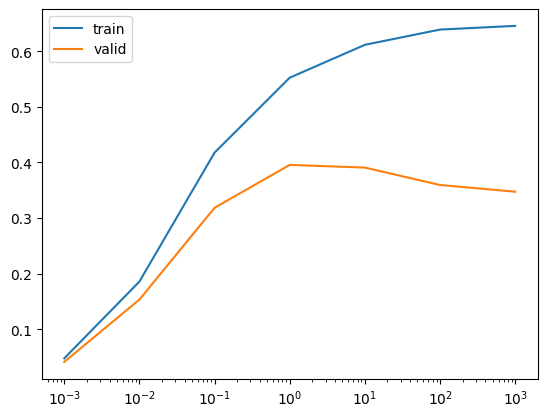

In [12]:
plt.plot(C_values, train_scores_log, label='train')
plt.plot(C_values, test_scores_log, label='valid')
plt.xscale('log')
plt.legend()
plt.show()


In [13]:
# run basic KNN model
from sklearn.neighbors import KNeighborsClassifier

test_scores_knn = []
train_scores_knn = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_scores_knn.append(knn.score(X_train, y_train))
    test_scores_knn.append(knn.score(X_valid, y_valid))

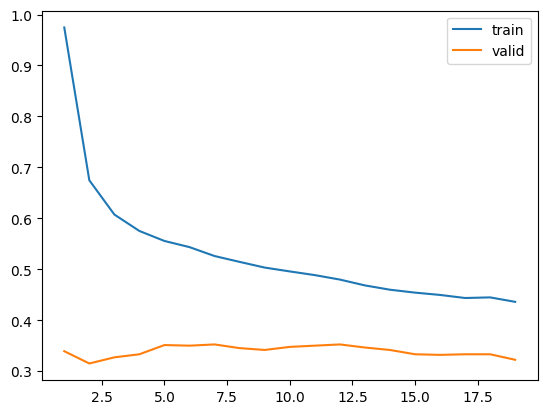

In [14]:
plt.plot(range(1, 20), train_scores_knn, label='train')
plt.plot(range(1, 20), test_scores_knn, label='valid')
plt.legend()

In [15]:
# run basic SVM model
from sklearn.svm import SVC

test_scores_svm = []
train_scores_svm = []

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in C_values:
    svm = SVC(C=c, gamma='auto')
    svm.fit(X_train, y_train)
    train_scores_svm.append(svm.score(X_train, y_train))
    test_scores_svm.append(svm.score(X_valid, y_valid))

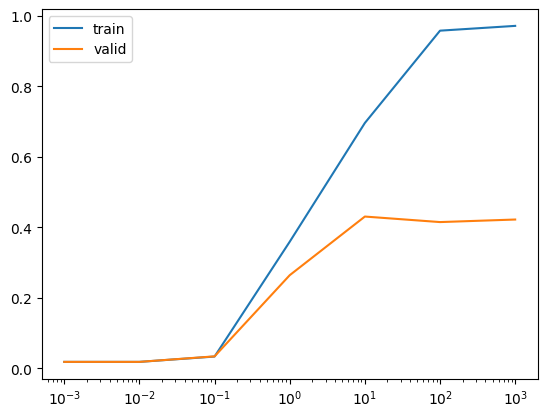

In [16]:
plt.plot(C_values, train_scores_svm, label='train')
plt.plot(C_values, test_scores_svm, label='valid')
plt.xscale('log')
plt.legend()
plt.show()

In [17]:
# run basic decision tree model
from sklearn.tree import DecisionTreeClassifier

test_scores_dt = []
train_scores_dt = []

for d in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    train_scores_dt.append(dt.score(X_train, y_train))
    test_scores_dt.append(dt.score(X_valid, y_valid))

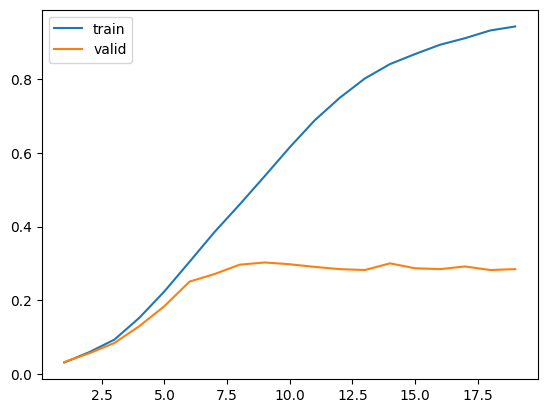

In [18]:
plt.plot(range(1, 20), train_scores_dt, label='train')
plt.plot(range(1, 20), test_scores_dt, label='valid')
plt.legend()
plt.show()

In [19]:
# run basic random forest model
from sklearn.ensemble import RandomForestClassifier

test_scores_rf = []
train_scores_rf = []

for d in range(1, 20):
    rf = RandomForestClassifier(max_depth=d)
    rf.fit(X_train, y_train)
    train_scores_rf.append(rf.score(X_train, y_train))
    test_scores_rf.append(rf.score(X_valid, y_valid))

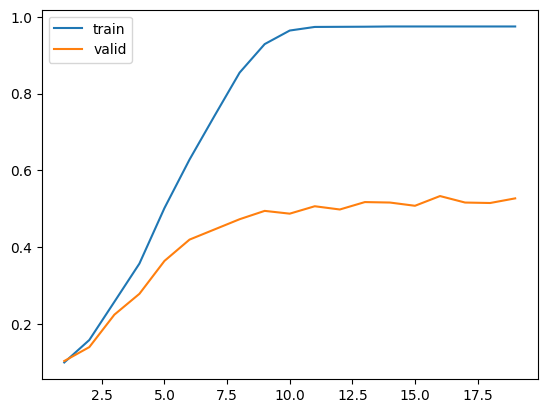

In [20]:
plt.plot(range(1, 20), train_scores_rf, label='train')
plt.plot(range(1, 20), test_scores_rf, label='valid')
plt.legend()
plt.show()

In [21]:
# run XGBoost model
from xgboost import XGBClassifier

test_scores_xgb = []
train_scores_xgb = []

for d in range(1, 20):
    xgb = XGBClassifier(max_depth=d)
    xgb.fit(X_train, y_train)
    train_scores_xgb.append(xgb.score(X_train, y_train))
    test_scores_xgb.append(xgb.score(X_valid, y_valid))

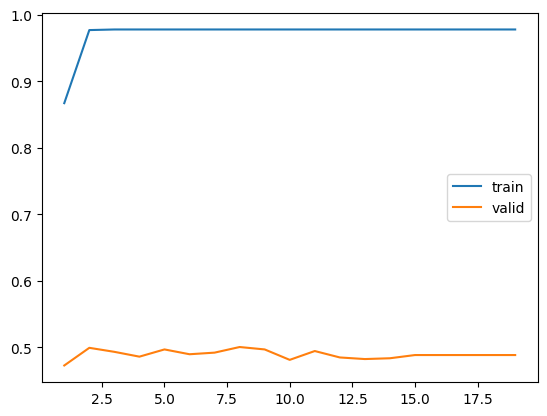

In [22]:
plt.plot(range(1, 20), train_scores_xgb, label='train')
plt.plot(range(1, 20), test_scores_xgb, label='valid')
plt.legend()
plt.show()

In [23]:
# random forest scored about 0.6 on validation set, so we will use it for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

gs_X_train = pd.concat([X_train, X_valid])
gs_y_train = pd.concat([y_train, y_valid])

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [15, 16, 17, 18, 19, 20],
    'warm_start': [True, False],
    'max_features': [2, 3],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 8],
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(gs_X_train, gs_y_train)

grid_search.best_params_


Fitting 3 folds for each of 1440 candidates, totalling 4320 fits
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, warm_start=True; total time=   1.1s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, warm_start=False; total time=   1.2s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, warm_start=False; total time=   1.2s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, warm_start=True; total time=   1.2s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, warm_start=False; total time=   1.2s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, warm_start=True; total time=   1.2s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, warm_start=True; total time=  

/Users/dubplate/.pyenv/versions/3.8.0/envs/capstone/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=400, warm_start=False; total time=   4.8s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=400, warm_start=False; total time=   4.3s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=400, warm_start=False; total time=   4.5s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=500, warm_start=True; total time=   5.4s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=500, warm_start=True; total time=   5.5s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, warm_start=True; total time=   1.0s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=500, warm_start=True; total time=   5.0s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, 

{'max_depth': 15,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 500,
 'warm_start': False}

In [31]:
X_test = X_test.drop(['pose'], axis=1)
y_test = test['pose']

In [32]:
# run random forest model with best parameters
rf = RandomForestClassifier(max_depth=19, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=200, warm_start=False)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5579150579150579

In [33]:
y_pred = rf.predict(X_test)

In [34]:
# view confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# loop y_test and y_pred to get the correct labels
y_test_labels = []
y_pred_labels = []
labels = np.sort(unique_poses).tolist()

for i in range(len(y_test)):
    y_test_labels.append(unique_poses[y_test[i]])
    y_pred_labels.append(unique_poses[y_pred[i]])

print(y_test_labels)
print(y_pred_labels)

['vriksasana', 'garudasana', 'purvottanasana', 'chaturanga-dandasana', 'gomukhasana', 'balasana', 'adho-mukha-vrksasana', 'ardha-matsyendrasana', 'padmasana', 'camatkarasana', 'dwi-pada-viparita-dandasana', 'dandasana', 'utthita-parsvakonasana', 'supta-matsyendrasana', 'tolasana', 'ustrasana', 'utthita-hasta-padangustasana', 'baddha-konasana', 'utthita-hasta-padangusthasana', 'chakravakasana', 'dandasana', 'supta-virasana', 'supta-matsyendrasana', 'purvottanasana', 'anjaneyasana', 'pasasana', 'adho-mukha-svanasana', 'makarasana', 'paschimottanasana', 'bhujangasana', 'eka-pada-rajakapotasana', 'parivrtta-trikonasana', 'gomukhasana', 'parivrtta-trikonasana', 'salabhasana', 'virasana', 'dhanurasana', 'mayurasana', 'eka-pada-koundinyanasana-i', 'gomukhasana', 'salamba-sirsasana', 'chaturanga-dandasana', 'anjaneyasana', 'setu-bandha-sarvangasana', 'urdhva-prasarita-eka-padasana', 'kapotasana', 'virasana', 'utthita-trikonasana', 'pasasana', 'viparita-karani', 'virabhadrasana-iii', 'sukhasana

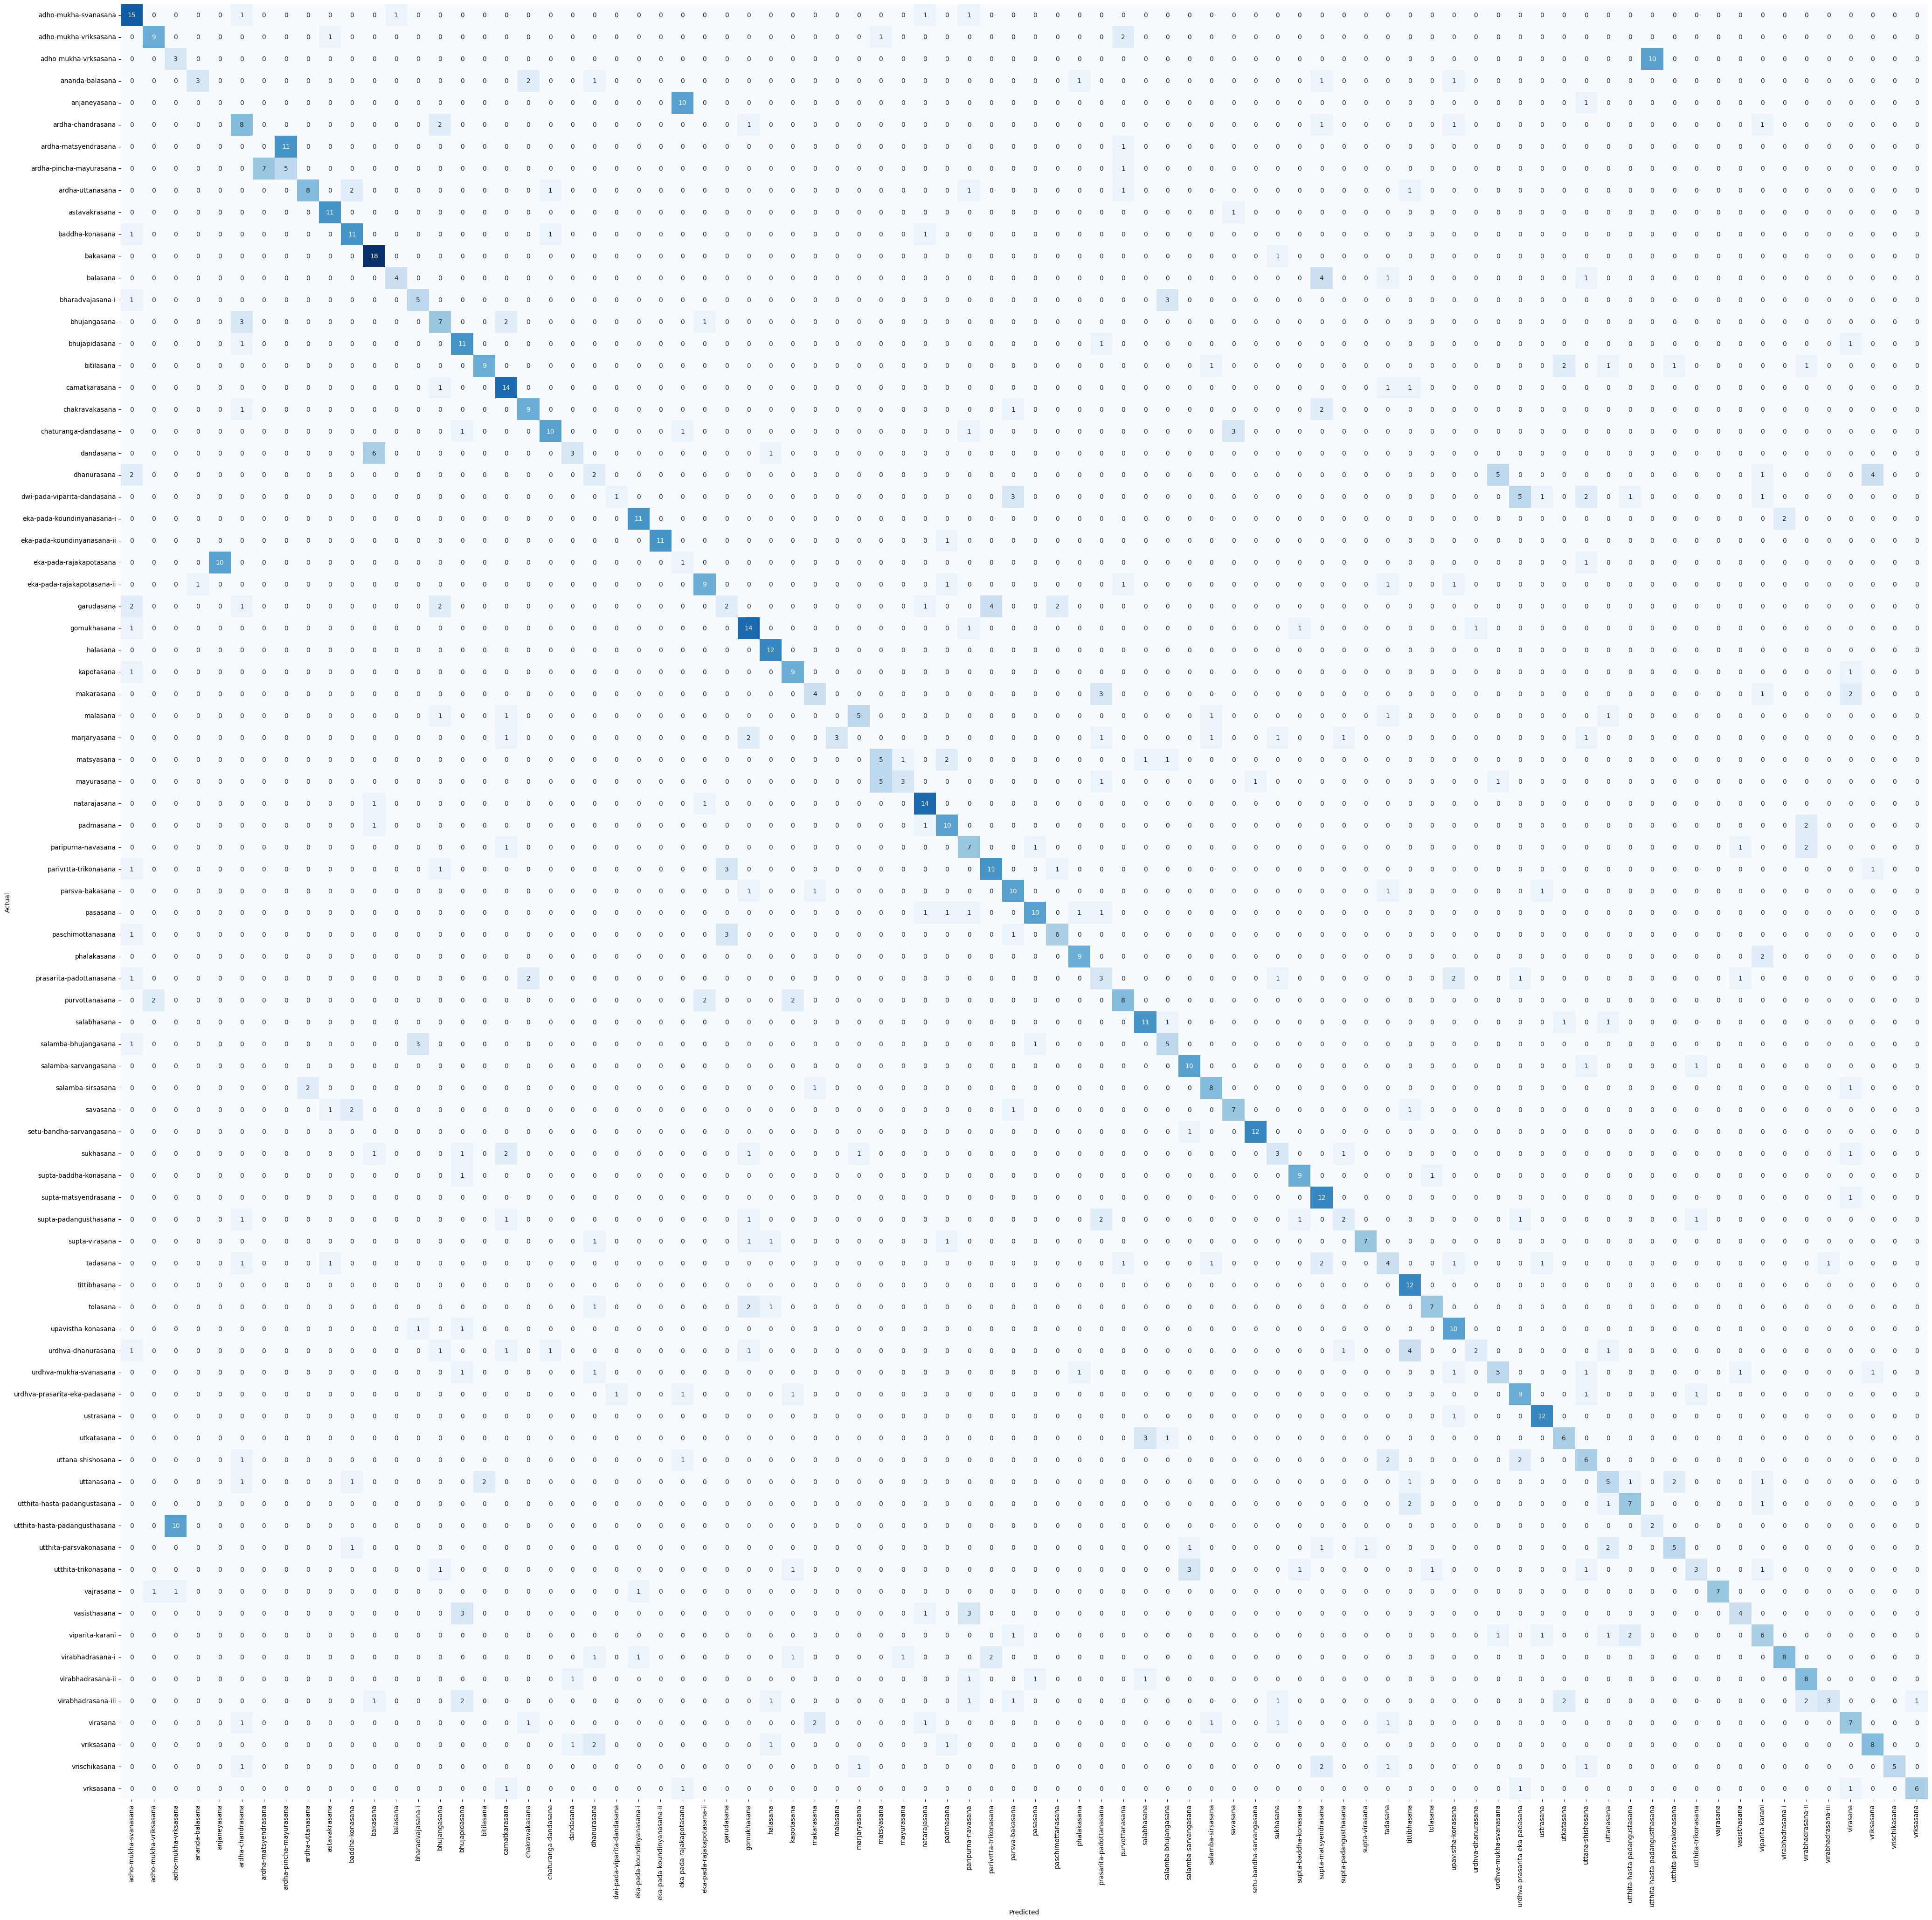

In [36]:
# plot confusion matrix
plt.figure(figsize=(50, 50), dpi=100)
cm_array = confusion_matrix(y_test_labels, y_pred_labels)
cm_array_df = pd.DataFrame(cm_array, index=labels, columns=labels)
sns.heatmap(cm_array_df, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.92      0.63        13
           1       0.00      0.00      0.00        11
           2       0.07      0.08      0.07        12
           3       0.67      0.83      0.74        12
           4       0.80      0.57      0.67        14
           5       0.79      0.92      0.85        12
           6       0.64      0.95      0.77        19
           7       0.80      0.40      0.53        10
           8       0.44      0.54      0.48        13
           9       0.52      0.79      0.63        14
          10       0.82      0.60      0.69        15
          11       0.58      0.82      0.68        17
          12       0.64      0.69      0.67        13
          13       0.60      0.30      0.40        10
          14       0.22      0.14      0.17        14
          15       0.41      0.58      0.48        12
          16       0.65      0.61      0.63        18
          17       0.62    

<Axes: xlabel='feature'>

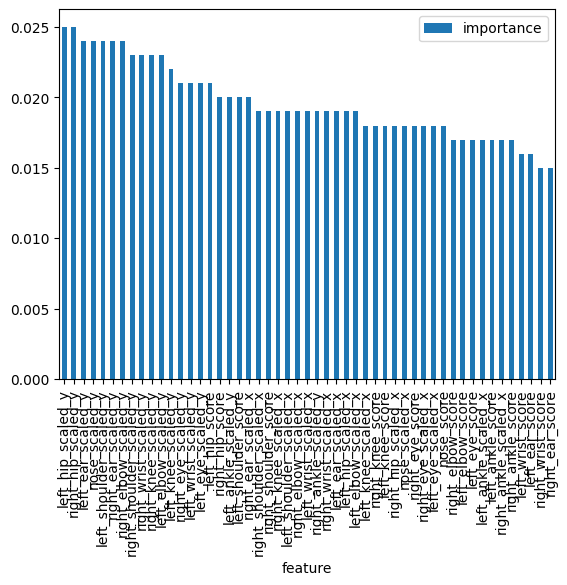

In [40]:
# view feature importances
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(rf.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances.head(15)

# plot feature importances
importances.plot.bar()